In [1]:
#solving a  data science problem 
#1.understand the problem and understand the varibles
#2.clean the data
#find relationships between variables and try to merge them
#3.create a model by choosing multiple models and check their efficiency using metrics
#4.test the data
#5.find importance of variables and remove some variables  for future use with little accuracy lose


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


In [3]:
data_income=pd.read_csv("income.csv")
data=data_income.copy(deep=True)


## 1.understand the data

In [4]:
#to know datatypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [5]:
#to know the existence of null values
data.isnull()


,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum() #no missing values

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [7]:
#descriptive statistics of the data
summary_num=data.describe()
print("numerical data summary")
print(summary_num)

summary_cat=data.describe(include="O")
print("catagorical data summary")
print(summary_cat)

numerical data summary
                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000
catagorical data summary
         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038      

In [8]:
data["JobType"].value_counts()

JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [9]:
data["occupation"].value_counts()

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64

In [10]:
print(np.unique(data["JobType"]))
print(np.unique(data["occupation"]))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [11]:
data=pd.read_csv("income.csv",na_values=[" ?"])

In [12]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

## 2.Datapreprocessing

In [13]:
missing=data[data.isnull().any(axis=1)] #returns rows containing atleast one missing value

In [14]:
missing


,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [15]:
data2=data.dropna(axis=0) #since we dont have any logic to fill the missing values

In [16]:
data2.shape

(30162, 13)

### relationship between independent variables

In [17]:

#relation between nuerical variables

In [18]:
corelation=data2.select_dtypes(include="int64").corr()
corelation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


# Cross table and Data visualization

In [19]:

#gender proporation table

In [20]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [21]:
pd.crosstab(index=data["gender"],columns="count",normalize=True)

col_0,count
gender,
Female,0.331728
Male,0.668272


In [22]:
#gender vs salary 
pd.crosstab(index=data["gender"],columns=data["SalStat"],normalize="index" ,margins=True)

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.109540,0.890460
Male,0.305709,0.694291
All,0.240634,0.759366


In [33]:
#visualization
data["SalStat"]

0         less than or equal to 50,000
1         less than or equal to 50,000
2                  greater than 50,000
3         less than or equal to 50,000
4         less than or equal to 50,000
                     ...              
31973     less than or equal to 50,000
31974     less than or equal to 50,000
31975     less than or equal to 50,000
31976     less than or equal to 50,000
31977     less than or equal to 50,000
Name: SalStat, Length: 31978, dtype: object

C:\Users\MAGANTI S\AppData\Local\Temp\ipykernel_15692\66437984.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2["age"],bins=10,kde=False)


<Axes: xlabel='age'>

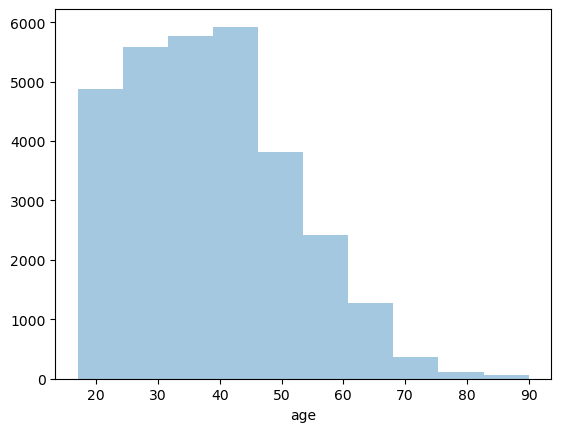

In [27]:
#histogram of age
sns.distplot(data2["age"],bins=10,kde=False)


# model building

In [34]:
data2["SalStat"]=data2["SalStat"].map({' less than or equal to 50,000':0,' greater than 50,000':1})


C:\Users\MAGANTI S\AppData\Local\Temp\ipykernel_15692\3455250115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["SalStat"]=data2["SalStat"].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [35]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,0
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,0
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,0


In [36]:
newdata=pd.get_dummies(data2,drop_first=True)

In [37]:
columns=list(newdata.columns)

In [38]:
columns

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

In [39]:
features=list(set(columns)-set(['SalStat']))

In [41]:
features

['nativecountry_ Scotland',
 'nativecountry_ Ecuador',
 'nativecountry_ Japan',
 'nativecountry_ Poland',
 'nativecountry_ Greece',
 'occupation_ Transport-moving',
 'nativecountry_ Mexico',
 'nativecountry_ Hong',
 'EdType_ 1st-4th',
 'race_ White',
 'nativecountry_ Philippines',
 'occupation_ Craft-repair',
 'occupation_ Handlers-cleaners',
 'EdType_ Assoc-acdm',
 'nativecountry_ El-Salvador',
 'relationship_ Not-in-family',
 'nativecountry_ Jamaica',
 'EdType_ 9th',
 'occupation_ Exec-managerial',
 'nativecountry_ Nicaragua',
 'occupation_ Protective-serv',
 'nativecountry_ Guatemala',
 'EdType_ Assoc-voc',
 'nativecountry_ Dominican-Republic',
 'EdType_ 5th-6th',
 'nativecountry_ Italy',
 'nativecountry_ South',
 'nativecountry_ Puerto-Rico',
 'occupation_ Other-service',
 'relationship_ Own-child',
 'JobType_ Private',
 'occupation_ Armed-Forces',
 'nativecountry_ Germany',
 'maritalstatus_ Married-AF-spouse',
 'nativecountry_ Taiwan',
 'nativecountry_ United-States',
 'EdType_ Do

In [52]:
x=newdata[features].replace({False:0,True:1}).values
y=newdata["SalStat"].values

In [53]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)